# License & Attribution

**Author:** Amir Hossein Amou Jafari

This code and all related content have been developed by **Amir Hossein Amou Jafari**.  
Any **use, redistribution, or modification** of this code **without proper attribution and explicit permission from the author is strictly prohibited**.  
Please respect the author’s rights by citing the source whenever using this code in projects, publications, or presentations.

---

# Bio & Links



**LinkedIn:**  
https://linkedin.com/in/amirhosseinamoujafari

**Portfolio / Website (optional):**  
https://www.youtube.com/@LearnwithAjj


# ♛ N-Queens Problem — Mathematical Formulation

The **N-Queens Problem** seeks to place `N` queens on an `N × N` chessboard such that no two queens threaten each other. That means:

- Only one queen per **row**
- Only one queen per **column**
- No two queens on the same **diagonal** (↘ or ↙)

---

## 🧮 Sets

Let:

- \( I = \{1, 2, \dots, N\} \): set of rows  
- \( J = \{1, 2, \dots, N\} \): set of columns

---

## 📦 Decision Variables

Let:

- \( U_{i,j} \in \{0, 1\} \): binary variable that is `1` if a queen is placed at row `i`, column `j`; otherwise `0`.

---

## 🎯 Objective Function

Although this is a feasibility problem (we only want a valid configuration), we can define a dummy objective:

$$
\min \sum_{i=1}^{N} \sum_{j=1}^{N} U_{i,j}
$$

> In a valid solution, exactly `N` queens will be placed, so the objective value will always be `N`.

---

## 📏 Constraints

### ✅ One queen per row:

$$
\sum_{j=1}^{N} U_{i,j} = 1 \quad \forall i \in I
$$

### ✅ One queen per column:

$$
\sum_{i=1}^{N} U_{i,j} = 1 \quad \forall j \in J
$$

### ✅ At most one queen on each main diagonal (↘):

All cells with constant $i + j = k$ lie on the same **main diagonal**. For all such diagonals:

$$
\sum_{\substack{1 \le i \le N \\ 1 \le j = k - i \le N}} U_{i,j} \le 1 \quad \forall k \in \{2, \dots, 2N \}
$$

### ✅ At most one queen on each anti-diagonal (↙):

All cells with constant $i - j = k$ lie on the same **anti-diagonal**. For all such diagonals:

$$
\sum_{\substack{1 \le i \le N \\ 1 \le j = i - k \le N}} U_{i,j} \le 1 \quad \forall k \in \{-N+1, \dots, N-1\}
$$

---

## ✅ Binary Domain

$$
U_{i,j} \in \{0, 1\} \quad \forall i \in I, \forall j \in J
$$

---

## ✅ Full Model Summary

$$
\begin{aligned}
\min \quad & \sum_{i=1}^{N} \sum_{j=1}^{N} U_{i,j} \\
\text{s.t.} \quad
& \sum_{j=1}^{N} U_{i,j} = 1 && \forall i = 1, \dots, N \\
& \sum_{i=1}^{N} U_{i,j} = 1 && \forall j = 1, \dots, N \\
& \sum_{\substack{1 \le i \le N \\ 1 \le j = k - i \le N}} U_{i,j} \le 1 && \forall k = 2, \dots, 2N  \\
& \sum_{\substack{1 \le i \le N \\ 1 \le j = i - k \le N}} U_{i,j} \le 1 && \forall k = -N+1, \dots, N - 1 \\
& U_{i,j} \in \{0, 1\} && \forall i, j
\end{aligned}
$$

---

> ✅ You can implement this model in Python using Pyomo and solve it using solvers like CPLEX, CBC, or GLPK.


In [35]:
import pyomo.environ as pyo

def n_queens_model(N=8):
    """N-Queens model to find a safe placement of N queens on an N×N chessboard"""

    m = pyo.ConcreteModel()

    # Sets of row and column indices
    m.I = pyo.RangeSet(1, N)
    m.J = pyo.RangeSet(1, N)

    # Binary variable: U[i,j] = 1 if a queen is placed at row i and column j
    m.U = pyo.Var(m.I, m.J, domain=pyo.Binary)

    # Objective function (optional – for completeness): minimize total number of queens
    @m.Objective(sense=pyo.minimize)
    def minimize_total_queens(m):
        return sum(m.U[i, j] for i in m.I for j in m.J)

    # Constraint: Exactly one queen per row
    @m.Constraint(m.I)
    def one_queen_per_row(m, i):
        return sum(m.U[i, j] for j in m.J) == 1

    # Constraint: Exactly one queen per column
    @m.Constraint(m.J)
    def one_queen_per_col(m, j):
        return sum(m.U[i, j] for i in m.I) == 1

    # Constraint: At most one queen on each main diagonal (↘), where i + j = constant
    m.main_diagonal = pyo.ConstraintList()
    for k in range(2, 2 * N+1):
        m.main_diagonal.add(
            sum(m.U[i, k - i] for i in range(1, k) if 1 <= i <= N and 1 <= k - i <= N) <= 1
        )

    # Constraint: At most one queen on each anti-diagonal (↙), where i - j = constant
    m.anti_diagonal = pyo.ConstraintList()
    for k in range(-N + 1, N):
        m.anti_diagonal.add(
            sum(m.U[i, i - k] for i in range(1, N + 1) if 1 <= i <= N and 1 <= i - k <= N) <= 1
        )

    return m

# Create model for N×N chessboard
N = 8
model = n_queens_model(N)

# Solve the model using CPLEX (or other solvers like GLPK, CBC)
solver = pyo.SolverFactory('cplex')
result = solver.solve(model, tee=True)

# Display the result
print(f"\nOptimal queen placement for N = {N}:\n")
for i in model.I:
    for j in model.J:
        if pyo.value(model.U[i, j]) == 1:
            print(f"Queen at row {i}, column {j}")



Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 22.1.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2022.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\ASUS\AppData\Local\Temp\tmp6dxywp86.cplex.log' open.
CPLEX> Problem 'C:\Users\ASUS\AppData\Local\Temp\tmp1pbtgkeg.pyomo.lp' read.
Read time = 0.02 sec. (0.01 ticks)
CPLEX> Problem name         : C:\Users\ASUS\AppData\Local\Temp\tmp1pbtgkeg.pyomo.lp
Objective sense      : Minimize
Variables            :      64  [Binary: 64]
Objective nonzeros   :      64
Linear constraints   :      46  [Less: 30,  Equal: 16]
  Nonzeros           :     256
  RHS nonzeros       :      46

Variables            : Min LB: 0.000000         Max UB: 1.000000       
Objective nonzeros   : Min   : 1.000000     

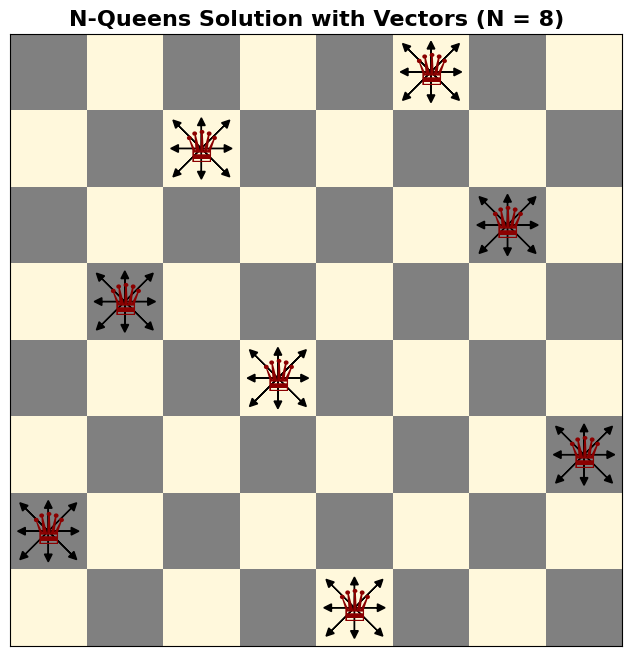

In [36]:
import matplotlib.pyplot as plt
import pyomo.environ as pyo

def plot_n_queens_with_vectors(model, N):
    """Visualizes the N×N chessboard with queens and arrows showing their movement directions"""

    fig, ax = plt.subplots(figsize=(N / 1.2, N / 1.2))

    # Draw the chessboard grid
    for i in range(N):
        for j in range(N):
            color = 'cornsilk' if (i + j) % 2 == 0 else 'gray'
            ax.add_patch(plt.Rectangle((j, i), 1, 1, facecolor=color))

    # Define the 8 possible queen movement directions as vectors
    directions = [
        (1, 0), (-1, 0),     # Horizontal → ←
        (0, 1), (0, -1),     # Vertical ↑ ↓
        (1, 1), (-1, 1),     # Diagonal ↗ ↖
        (1, -1), (-1, -1)    # Diagonal ↘ ↙
    ]

    # Place queens and draw arrows from each queen
    for i in range(1, N + 1):
        for j in range(1, N + 1):
            if pyo.value(model.U[i, j]) == 1:
                # Calculate the queen’s position (x: column, y: row, inverted for matplotlib)
                x = j - 1 + 0.5
                y = N - i + 0.5

                # Draw the queen symbol
                ax.text(x, y, '♛', ha='center', va='center',
                        fontsize=32, color='darkred', zorder=3)

                # Draw arrows showing the queen’s movement directions
                for dx, dy in directions:
                    ax.arrow(x, y, dx * 0.3, dy * 0.3,
                             head_width=0.1, head_length=0.1,
                             fc='black', ec='black', zorder=2)

    # Final plot configuration
    ax.set_xlim(0, N)
    ax.set_ylim(0, N)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"N-Queens Solution with Vectors (N = {N})",
                 fontsize=16, fontweight='bold')
    ax.set_aspect('equal')
    plt.tight_layout()
    plt.show()

# Call the function with your solved model
plot_n_queens_with_vectors(model, N)
